# Part 1: Data Preprocessing

Dataset link: [Predicting Churn for Bank Customers](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv)

## Importing the libraries

In [38]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Convolution2D
from keras.losses import BinaryCrossentropy

## Dealing dataset

In [60]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [61]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [63]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
dataset.shape

(10000, 11)

In [65]:
# detect missing data
dataset.isnull().values.any()

False

In [66]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [67]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [68]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [69]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [70]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [77]:
x = dataset.drop(columns='Exited').values

In [78]:
y = dataset['Exited'].values

In [79]:
x.shape, y.shape

((10000, 11), (10000,))

## Splitting the training data and testing data

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [81]:
x_train.shape, x_test.shape

((8000, 11), (2000, 11))

## Feature Scaling

In [82]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2: Building the model

## TensorFlow implementation

In [84]:
layer_1 = Dense(units=20, activation="sigmoid")
layer_2 = Dense(units=5, activation="sigmoid")
layer_3 = Dense(units=1, activation="sigmoid")

model = Sequential([layer_1, layer_2, layer_3])

model.compile(loss=BinaryCrossentropy())

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5207
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4838
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4606
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4444
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4348
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4301
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4277
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4263
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4251
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4239
Epoch 11/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4224
Epoch 12/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 13/100


## Accuracy

In [85]:
y_hat = model.predict(x_test)
y_hat = y_hat.flatten()

63/63 [==============================] - 0s 2ms/step


In [86]:
def accuracy(y_hat, y, threshold):
    acc = 0
    for i in range(len(y)):
        if y[i] == 1:
            if y_hat[i] >= threshold:
                acc += 1
        else:
            if y_hat[i] < threshold:
                acc += 1
    return acc / len(y) * 100

In [87]:
acc_max = 0
threshold_optimal = 0
thresholds = np.arange(0.1,1, step = 0.01)
acc = np.zeros_like(thresholds)
for i, threshold in enumerate(thresholds):
    acc[i] = accuracy(y_hat, y_test, threshold)
    print(f"threshold = {threshold:.2f}, accuracy = {acc[i]}") 
    if acc_max < acc[i]:
        acc_max = acc[i]
        threshold_optimal = thresholds[i]

threshold = 0.10, accuracy = 65.3
threshold = 0.11, accuracy = 67.25
threshold = 0.12, accuracy = 68.95
threshold = 0.13, accuracy = 70.19999999999999
threshold = 0.14, accuracy = 71.8
threshold = 0.15, accuracy = 73.3
threshold = 0.16, accuracy = 74.8
threshold = 0.17, accuracy = 76.44999999999999
threshold = 0.18, accuracy = 77.05
threshold = 0.19, accuracy = 78.05
threshold = 0.20, accuracy = 78.8
threshold = 0.21, accuracy = 79.4
threshold = 0.22, accuracy = 80.35
threshold = 0.23, accuracy = 81.45
threshold = 0.24, accuracy = 81.95
threshold = 0.25, accuracy = 82.45
threshold = 0.26, accuracy = 82.95
threshold = 0.27, accuracy = 83.2
threshold = 0.28, accuracy = 83.65
threshold = 0.29, accuracy = 84.1
threshold = 0.30, accuracy = 84.25
threshold = 0.31, accuracy = 84.5
threshold = 0.32, accuracy = 84.85000000000001
threshold = 0.33, accuracy = 85.2
threshold = 0.34, accuracy = 85.3
threshold = 0.35, accuracy = 85.45
threshold = 0.36, accuracy = 85.65
threshold = 0.37, accuracy = 8

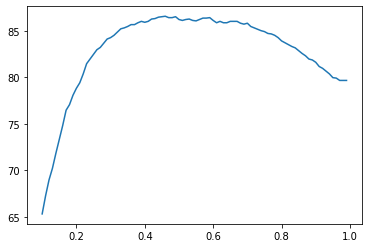

In [88]:
plt.plot(thresholds, acc)

# Part 3: Answer

## Dealing dataset

In [92]:
dataset_ans = pd.read_csv('test.csv')

In [94]:
dataset_ans = dataset_ans.drop(columns=['id', 'CustomerId', 'Surname'])

In [97]:
dataset_ans = pd.get_dummies(data=dataset_ans, drop_first=True)

In [98]:
dataset_ans

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,597,35,8,131101.04,1,1,1,192852.67,1,0,0
1,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2,706,42,8,95386.82,1,1,1,75732.25,0,1,0
3,788,32,4,112079.58,1,0,0,89368.59,0,0,1
4,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,530,41,4,0.00,2,0,1,147606.71,0,1,0
2996,639,77,6,80926.02,2,1,1,55829.25,0,0,1
2997,685,40,2,168001.34,2,1,1,167400.29,0,0,1
2998,692,69,10,154953.94,1,1,1,70849.47,0,0,1


In [99]:
x_ans = dataset_ans.values

In [101]:
x_ans.shape

(3000, 11)

## Feature Scaling

In [103]:
x_ans = sc.transform(x_ans)

## Answer

In [104]:
y_ans = model.predict(x_ans)
y_ans = y_ans.flatten()

94/94 [==============================] - 0s 1ms/step


In [105]:
y_ans

array([0.03324218, 0.06499646, 0.0266345 , ..., 0.08204953, 0.00833902,
       0.03134934], dtype=float32)

In [106]:
def standardized_y(y_hat, threshold = 0.9):
    for i in range(len(y_hat)):
        if y_hat[i] >= threshold:
            y_hat[i] = 1
        else:
            y_hat[i] = 0
    return y_hat

In [107]:
y_ans = standardized_y(y_ans, threshold_optimal)

In [108]:
for i in range(len(y_ans)):
    print(f"{y_ans[i]:.0f}")

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
